## Twitter Sentiment Analysis
Determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

conda install -n py36 -c conda-forge tweepy
conda install -n py36 -c conda-forge textblob


In [29]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
# We import our access keys:
from keys.twitter_keys import *    # This will allow us to use the keys as variables

# We import our access keys:
# optional from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api


Code for extracting from Twitter

In [17]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
# tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)

## search by hashtab
tweets = extractor.user_timeline(screen_name="cnnbrk", count=500) 

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Jayme Closs, the Wisconsin teen who vanished after her parents were killed, has been found alive nearly 3 months la… https://t.co/LX38GsE1UU

US begins withdrawing some military equipment from Syria https://t.co/CVRB9rMfol https://t.co/7oPcyCUB6V

Border wall funds could be diverted from a pool meant for Puerto Rico, Texas and other areas hit by disasters if Tr… https://t.co/T7RE6vjuOP

House passes bills to reopen the Agriculture and Transportation departments https://t.co/tq89I4B9A0 https://t.co/4VbGNBJFCG

As Mueller wraps up his probe, investigators focus on conflicting Trump statements that could be seen as an effort… https://t.co/sE3HI9ONZD



#### Creating a (pandas) DataFrame

In [18]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,"Jayme Closs, the Wisconsin teen who vanished a..."
1,US begins withdrawing some military equipment ...
2,Border wall funds could be diverted from a poo...
3,House passes bills to reopen the Agriculture a...
4,"As Mueller wraps up his probe, investigators f..."
5,Ex-Trump lawyer Michael Cohen has agreed to te...
6,"President Trump is headed to McAllen, Texas, t..."
7,"Hours before 32,000 educators were set to walk..."
8,"President Trump says he has an ""absolute right..."
9,Ex-Nissan chairman Carlos Ghosn has fallen ill...


In [19]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [20]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1083558116892049410
2019-01-11 02:56:01
Twitter Web Client
742
203
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/LX38GsE1UU', 'expanded_url': 'https://twitter.com/i/web/status/1083558116892049410', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [21]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,"Jayme Closs, the Wisconsin teen who vanished a...",140,1083558116892049410,2019-01-11 02:56:01,Twitter Web Client,742,203
1,US begins withdrawing some military equipment ...,104,1083517337981149184,2019-01-11 00:13:58,Twitter Web Client,200,93
2,Border wall funds could be diverted from a poo...,140,1083501510695124992,2019-01-10 23:11:05,Twitter Web Client,847,766
3,House passes bills to reopen the Agriculture a...,123,1083495243868196864,2019-01-10 22:46:11,Twitter Web Client,589,149
4,"As Mueller wraps up his probe, investigators f...",139,1083485404169494534,2019-01-10 22:07:05,Twitter Web Client,688,196
5,Ex-Trump lawyer Michael Cohen has agreed to te...,140,1083458625358708737,2019-01-10 20:20:40,TweetDeck,2922,823
6,"President Trump is headed to McAllen, Texas, t...",140,1083430989366521856,2019-01-10 18:30:51,TweetDeck,351,88
7,"Hours before 32,000 educators were set to walk...",140,1083410261409779712,2019-01-10 17:08:29,TweetDeck,161,65
8,"President Trump says he has an ""absolute right...",140,1083383421215346688,2019-01-10 15:21:50,TweetDeck,362,110
9,Ex-Nissan chairman Carlos Ghosn has fallen ill...,140,1083376514551480320,2019-01-10 14:54:23,TweetDeck,151,86


### Visualization and basic statistics

In [22]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 136.47


In [23]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

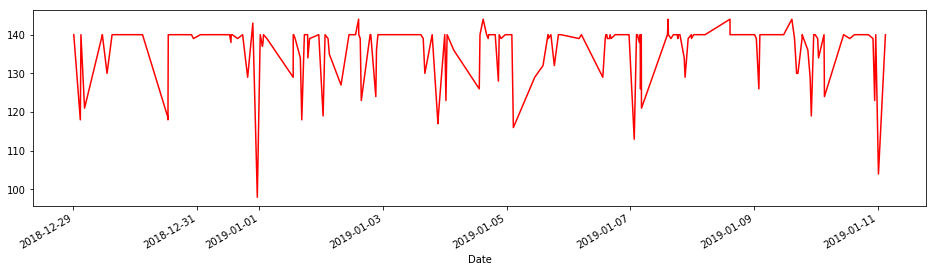

In [24]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');


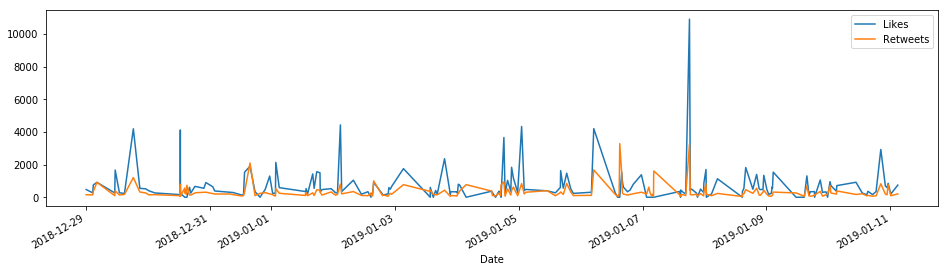

In [25]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);


### Sentimental Analysis

In [26]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [27]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"Jayme Closs, the Wisconsin teen who vanished a...",140,1083558116892049410,2019-01-11 02:56:01,Twitter Web Client,742,203,0
1,US begins withdrawing some military equipment ...,104,1083517337981149184,2019-01-11 00:13:58,Twitter Web Client,200,93,-1
2,Border wall funds could be diverted from a poo...,140,1083501510695124992,2019-01-10 23:11:05,Twitter Web Client,847,766,-1
3,House passes bills to reopen the Agriculture a...,123,1083495243868196864,2019-01-10 22:46:11,Twitter Web Client,589,149,0
4,"As Mueller wraps up his probe, investigators f...",139,1083485404169494534,2019-01-10 22:07:05,Twitter Web Client,688,196,0
5,Ex-Trump lawyer Michael Cohen has agreed to te...,140,1083458625358708737,2019-01-10 20:20:40,TweetDeck,2922,823,1
6,"President Trump is headed to McAllen, Texas, t...",140,1083430989366521856,2019-01-10 18:30:51,TweetDeck,351,88,-1
7,"Hours before 32,000 educators were set to walk...",140,1083410261409779712,2019-01-10 17:08:29,TweetDeck,161,65,0
8,"President Trump says he has an ""absolute right...",140,1083383421215346688,2019-01-10 15:21:50,TweetDeck,362,110,1
9,Ex-Nissan chairman Carlos Ghosn has fallen ill...,140,1083376514551480320,2019-01-10 14:54:23,TweetDeck,151,86,-1


In [28]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 31.5%
Percentage of neutral tweets: 40.0%
Percentage de negative tweets: 28.5%
